MORDM OPTIMIZATION

In [1]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import ema_logging, MultiprocessingEvaluator, Scenario
from ema_workbench.em_framework.optimization import EpsilonProgress

In [2]:
model, planning_steps = get_model_for_problem_formulation(3)

reference_scenario = Scenario('reference', **{'discount rate 0': 2.5, 'discount rate 1': 2.5, 'discount rate 2': 2.5, 'A.0_ID flood wave shape': 75, 'A.1_Bmax': 190, 'A.1_pfail': 0.5, 'A.1_Brate': 1.5, 'A.2_Bmax': 190, 'A.2_pfail': 0.5, 'A.2_Brate': 1.5, 'A.3_Bmax': 190, 'A.3_pfail': 0.5, 'A.3_Brate': 1.5, 'A.4_Bmax': 190, 'A.4_pfail': 0.5, 'A.4_Brate': 1.5, 'A.5_Bmax': 190, 'A.5_pfail': 0.5, 'A.5_Brate': 1.5})

In [8]:
convergence_metrics = [EpsilonProgress()]
nfe = 100000
epsilon = [0.25,] * len(model.outcomes)

In [9]:
ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model) as evaluator:
    total = evaluator.optimize(nfe=nfe, searchover='levers', epsilons=epsilon,  convergence=convergence_metrics,reference=reference_scenario)


 98%|████████████████████████████████▍| 98135/100000 [2:15:48<02:39, 11.68it/s]
100235it [2:18:40, 12.05it/s]                                                  
[MainProcess/INFO] optimization completed, found 1913 solutions


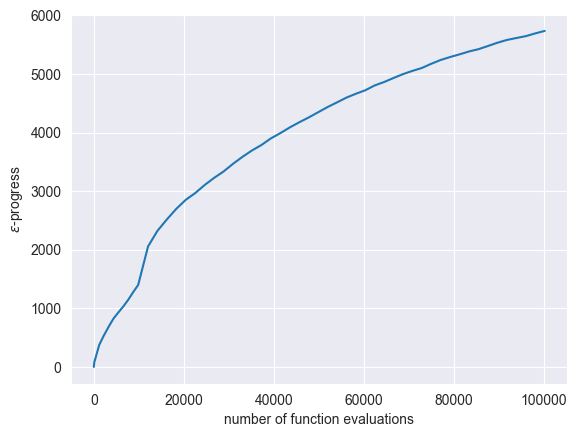

In [10]:
import matplotlib.pyplot as plt
import numpy as np
archive, convergence = total
fig, ax = plt.subplots()
ax.plot(convergence.nfe, convergence.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')

ax.set_xlabel('number of function evaluations')
plt.show()

In [11]:
from ema_workbench import save_results
archive, convergence = total
save_results(total, 'MORDM_100k_ep0.25.tar.gz'.format(nfe))

KeyError: 'epsilon_progress'

/Users/juanita/Documents/GitHub/epa1361_open/Py310-MBDM/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)
/Users/juanita/Documents/GitHub/epa1361_open/Py310-MBDM/lib/python3.11/site-packages/ema_workbench/analysis/parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)
  3%|▊                           | 30944/1000000 [3:20:21<104:34:26,  2.57it/s]


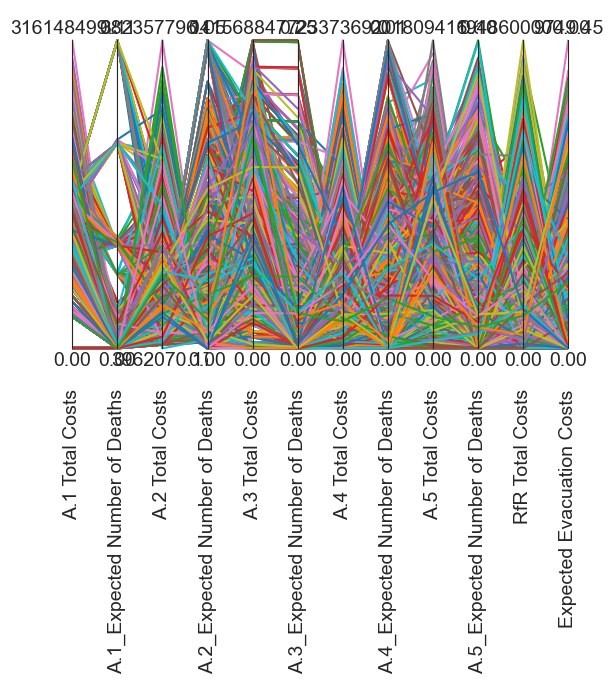

In [12]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
#paraxes.invert_axis('max_P')
plt.show()

In [13]:
import pandas as pd

archive['sum_deaths'] = archive['A.1_Expected Number of Deaths'] + archive['A.1_Expected Number of Deaths'] + archive['A.2_Expected Number of Deaths'] + archive['A.3_Expected Number of Deaths'] + archive['A.4_Expected Number of Deaths'] + archive['A.5_Expected Number of Deaths']
logical = archive.sum_deaths < 0.005
np.sum(logical)

175

/Users/juanita/Documents/GitHub/epa1361_open/Py310-MBDM/lib/python3.11/site-packages/ema_workbench/analysis/parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


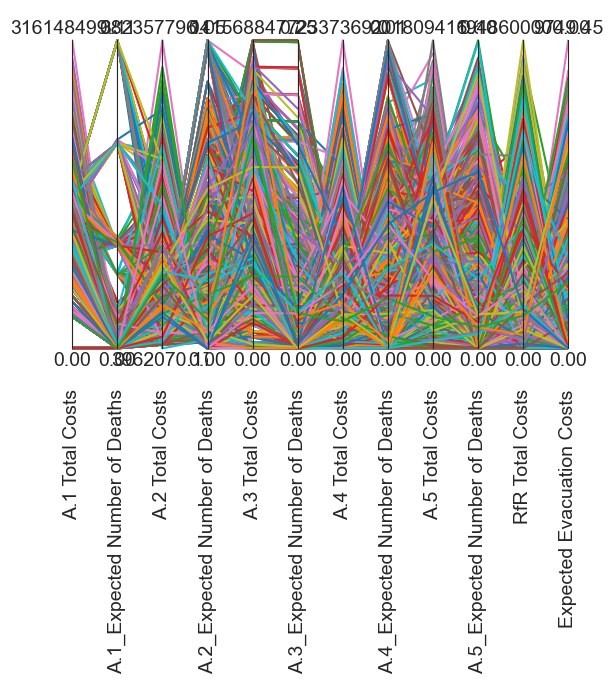

In [14]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
#paraxes.invert_axis('max_P')
plt.show()

In [15]:
policies = archive[logical]
policies = policies.drop([o.name for o in model.outcomes], axis=1)
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,sum_deaths
28,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,0.004726
33,1,0,1,0,0,0,0,0,0,1,...,0,7,4,6,0,0,4,0,0,0.004800
41,0,0,1,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0.002243
46,0,0,0,1,0,0,1,1,0,1,...,0,4,5,0,0,4,0,0,2,0.003607
69,0,0,0,0,0,0,0,0,0,0,...,9,1,5,0,0,0,3,0,0,0.001016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1,0,0,0,0,1,1,1,1,1,...,0,3,1,0,1,6,2,0,1,0.002848
1859,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,3,0.004068
1885,1,0,1,0,0,0,1,0,1,1,...,3,0,0,0,0,0,0,0,0,0.000676
1888,0,1,0,0,0,0,1,0,1,1,...,0,0,0,7,0,2,0,1,1,0.003978
